Shubh Agarwal


AIML B2

22070126108

# Question 1

Q1. A bike-sharing system is a service in which bikes are made available for shared use to
individuals on a short term basis for a price or free. Many bike share systems allow people to borrow
a bike from a "dock" which is usually computer-controlled wherein the user enters the payment
information, and the system unlocks it. This bike can then be returned to another dock belonging to
the same system.A US bike-sharing provider BikeIndia has recently suffered considerable dips in
their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to
sustain in the current market scenario. So, it has decided to come up with a mindful business plan to
be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the
economy restores to a healthy state.

In such an attempt, BikeIndia aspires to understand the demand for shared bikes among the people
after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned
this to prepare themselves to cater to the people's needs once the situation gets better all around
and stand out from other service providers and make huge profits.They have contracted a consulting
company to understand the factors on which the demand for these shared bikes depends.
Specifically, they want to understand the factors affecting the demand for these shared bikes in the
American market. The company wants to know:
Which variables are significant in predicting the demand for shared bikes. How well those variables
describe the bike demands Based on various meteorological surveys and people's styles, the
service provider firm has gathered a large dataset on daily bike demands across the American
market based on some factors.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("/content/day.csv")

In [55]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [56]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [57]:
df.shape

(730, 16)

In [58]:
# checking Are there any missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no Null Values


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [60]:
df = df.drop(columns = ['dteday'])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 85.7 KB


Checking Multicollinearity using variation inflation factor to check the required columns

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  vif = pd.DataFrame()
  vif["variables"]  = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values , i ) for i in range(X.shape[1])]

  return(vif)

In [63]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,instant,2211.202098
1,season,24.818167
2,yr,842.229037
3,mnth,643.004155
4,holiday,1.109868
5,weekday,3.263859
6,workingday,9.464035
7,weathersit,14.582932
8,temp,500.149047
9,atemp,578.778457


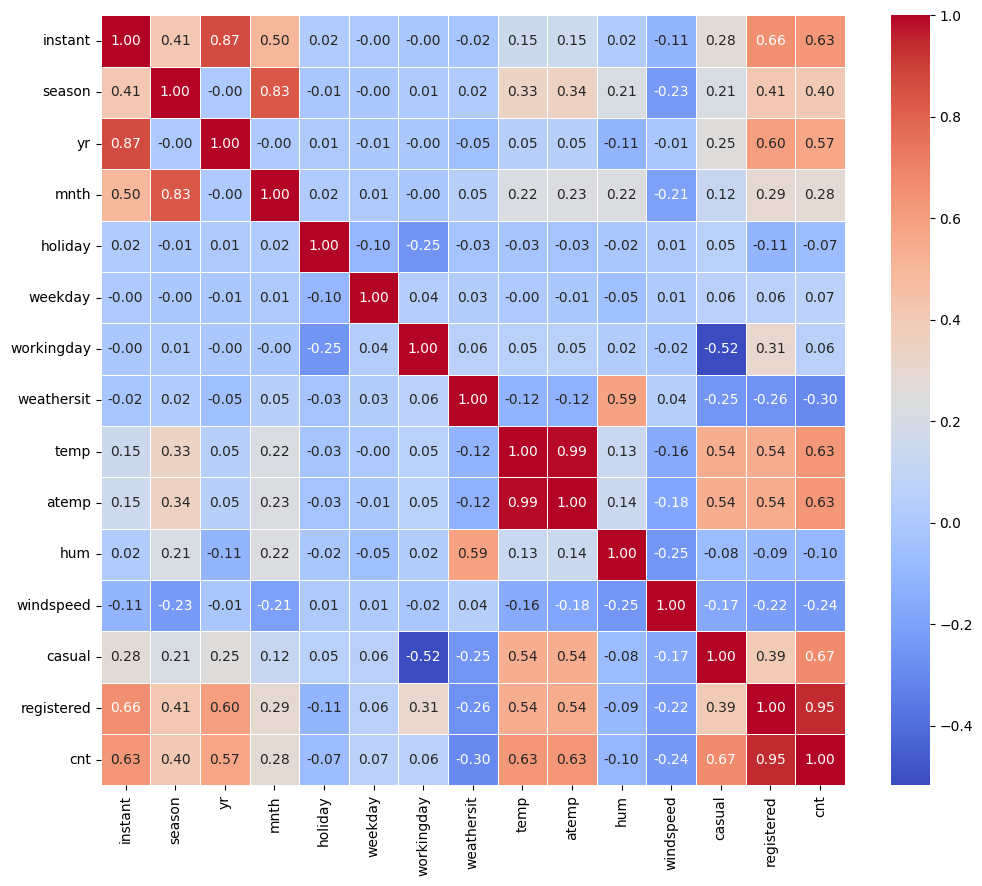

In [64]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.show()

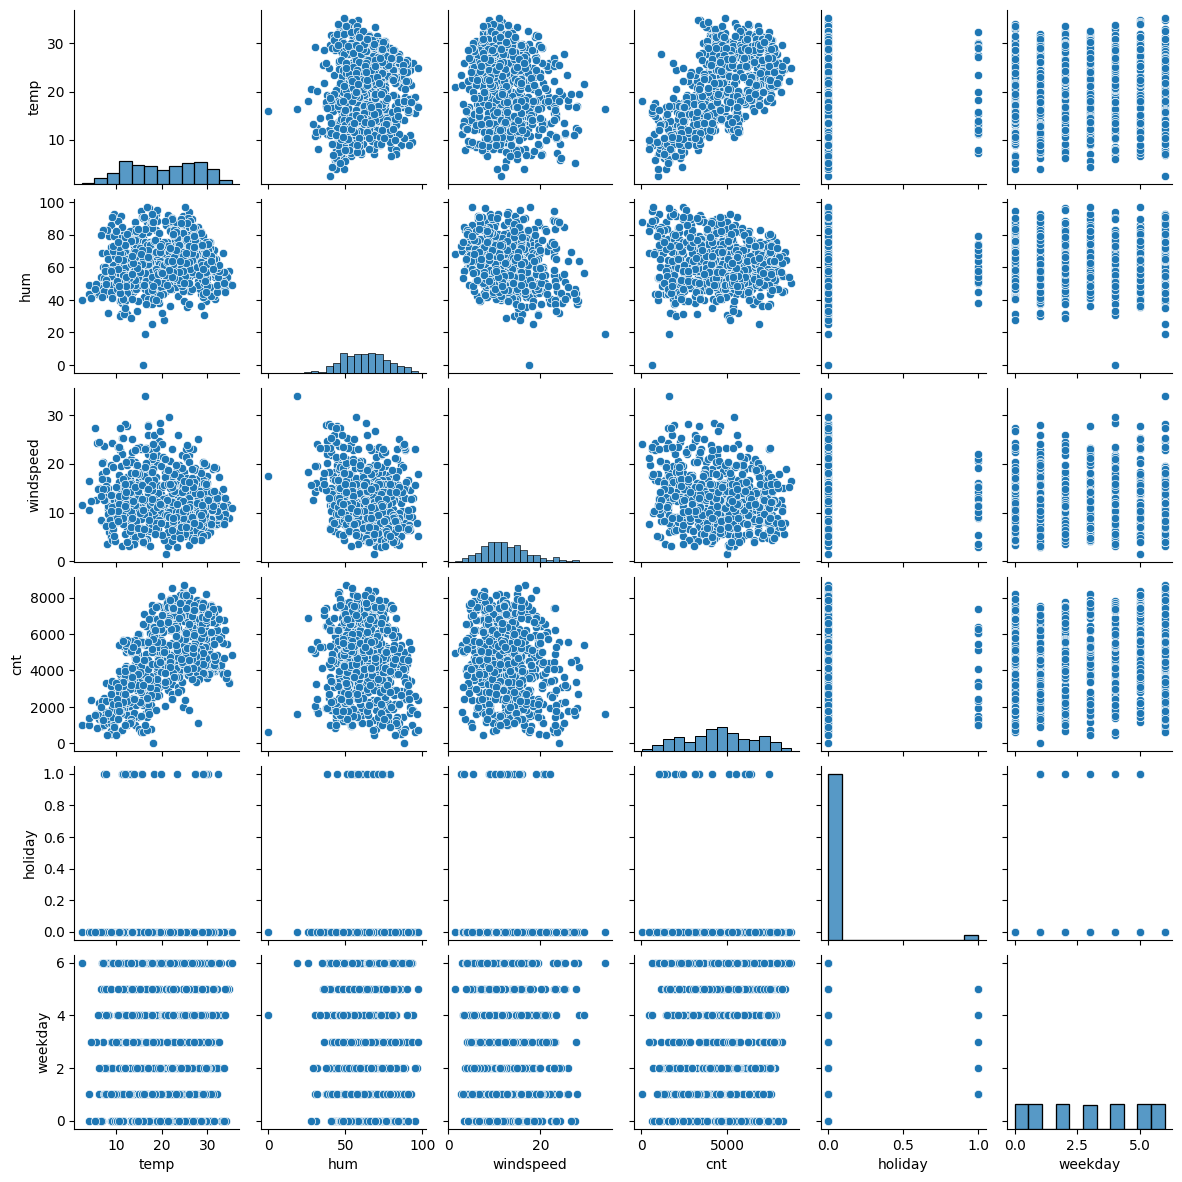

In [102]:
# Plotting scatter plot for the given data using seaborn
# Taking only required files

df_num = df[['temp', 'hum', 'windspeed','cnt','holiday','weekday']]
sns.pairplot(data = df_num , height = 2)

In [171]:
x = df[['temp','hum', 'windspeed','holiday','weekday']].values
y = df[['cnt']].values

In [172]:
x.shape

(730, 5)

In [173]:
y.shape

(730, 1)

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state = 42)


In [176]:
x_train.shape

(584, 5)

In [177]:
x_test.shape

(146, 5)

In [178]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [179]:
y_train.shape

(584, 1)

In [180]:
y_test.shape

(146, 1)

In [181]:
from sklearn.linear_model import LinearRegression

In [182]:
model = LinearRegression()

In [183]:
model.fit(x_train,y_train)

LinearRegression()

In [184]:
y_pred = model.predict(x_test)

In [185]:
y_pred.shape

(146, 1)

# Model Evaluation

In [186]:
print("Intercept: ",model.intercept_)
print("Coefficients: ")
list(zip(x,model.coef_))

Intercept:  [4546.36130137]
Coefficients: 


[(array([14.110847, 80.5833  , 10.749882,  0.      ,  6.      ]),
  array([1207.84035329, -410.61583684, -368.29029307, -121.40360598,
          113.27706362]))]

In [187]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse


1936124.6103779515

In [188]:
rmse = np.sqrt(mse)

In [189]:
rmse

1391.4469484597505

In [190]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test , y_pred)

In [191]:
r2

0.43435173799355886

In [192]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

1179.7039113898704

# Question 2

Q2: House Price Prediction
GitHub - Kaushik-Varma/mlr: Dataset Link

Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It
will be used by the management to understand how exactly the demands vary with different
features. They can accordingly manipulate the business strategy to meet the demand levels and
meet the customer's expectations. Further, the model will be a good way for management to
understand the demand dynamics of a new market.
Additional Questions:
 Which columns can be dropped for prediction in the given dataset
 Calculate slope and intercept for each factor
 Calculate MAPE,MSE and RMSE

In [193]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [194]:
df1 = pd.read_csv("/content/Housing.csv")

In [195]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [196]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [197]:


# Drop the binary columns
df1 = df1.drop(columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'])

df1.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
0,13300000,7420,4,2,3,2,furnished
1,12250000,8960,4,4,4,3,furnished
2,12250000,9960,3,2,2,2,semi-furnished
3,12215000,7500,4,2,2,3,furnished
4,11410000,7420,4,1,2,2,furnished


In [203]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
columns_for_regression = ['price', 'area', 'bedrooms', 'bathrooms', 'stories',
       'parking']
# Assuming X and y are your feature matrix and target variable
X = df1[columns_for_regression]
y = df1['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for column in columns_for_regression:
    # Use only the specified column as a feature
    X_train_col = X_train[[column]]
    X_test_col = X_test[[column]]

    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train_col, y_train)

    # Predict the target variable for the testing set
    y_pred = model.predict(X_test_col)

    # Calculate MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    # Calculate RMSE
    rmse = np.sqrt(mse)
    # Get the coefficients (slope) and intercept
    slope = model.coef_[0]
    intercept = model.intercept_

    print(f"For {column}:")
    print("Slope (Coefficient):", slope)
    print("Intercept:", intercept)



    print("MAPE:", mape)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("\n")


For price:
Slope (Coefficient): 1.0000000000000002
Intercept: -9.313225746154785e-10
MAPE: 6.905514340870869e-15
MSE: 3.3421277977534817e-19
RMSE: 5.781113904563274e-10


For area:
Slope (Coefficient): 425.72984193878284
Intercept: 2512254.2639593435
MAPE: 32.27918802602231
MSE: 3675286604768.185
RMSE: 1917103.7021424233


For bedrooms:
Slope (Coefficient): 873140.7403356589
Intercept: 2123152.2590986243
MAPE: 36.10478258522403
MSE: 4506505949062.205
RMSE: 2122853.256601173


For bathrooms:
Slope (Coefficient): 1960953.6091060522
Intercept: 2223852.173792338
MAPE: 35.2708522270962
MSE: 3951199278132.8564
RMSE: 1987762.379695535


For stories:
Slope (Coefficient): 829763.0377154476
Intercept: 3227798.3020529756
MAPE: 34.79327737890855
MSE: 4090538594062.8555
RMSE: 2022507.996044232


For parking:
Slope (Coefficient): 778700.3081650757
Intercept: 4172510.430868446
MAPE: 37.68208148799307
MSE: 4342068587420.0156
RMSE: 2083763.0833230575


